In [1]:
import pandas as pd
from collections import defaultdict
import seaborn as sns

In [2]:
team_name_changes = {
    "Atlanta Hawks": "Atlanta Hawks",
    "Boston Celtics": "Boston Celtics",
    "Brooklyn Nets": "Brooklyn Nets",
    "Chicago Bulls": "Chicago Bulls",
    "Charlotte Hornets": "Charlotte Hornets",
    "Cleveland Cavaliers": "Cleveland Cavaliers",
    "Dallas Mavericks": "Dallas Mavericks",
    "Denver Nuggets": "Denver Nuggets",
    "Detroit Pistons": "Detroit Pistons",
    "Golden State Warriors": "Golden State Warriors",
    "Houston Rockets": "Houston Rockets",
    "Indiana Pacers": "Indiana Pacers",
    "Los Angeles Clippers": "Los Angeles Clippers",
    "Los Angeles Lakers": "Los Angeles Lakers",
    "Memphis Grizzlies": "Memphis Grizzlies",
    "Miami Heat": "Miami Heat",
    "Milwaukee Bucks": "Milwaukee Bucks",
    "Minnesota Timberwolves": "Minnesota Timberwolves",
    "New Orleans Pelicans": "New Orleans Pelicans",
    "New York Knicks": "New York Knicks",
    "Oklahoma City Thunder": "Oklahoma City Thunder",
    "Orlando Magic": "Orlando Magic",
    "Phoenix Suns": "Phoenix Suns",
    "Portland Trail Blazers": "Portland Trail Blazers",
    "Sacramento Kings": "Sacramento Kings",
    "San Antonio Spurs": "San Antonio Spurs",
    "Toronto Raptors": "Toronto Raptors",
    "Utah Jazz": "Utah Jazz",
    "Washington Wizards": "Washington Wizards",
    "League Average": "League Average",
    "Charlotte Bobcats": "Charlotte Hornets",
    "New Orleans Hornets": "New Orleans Pelicans",
    "New Jersey Nets": "Brooklyn Nets",
    "Seattle Supersonics": "Oklahoma City Thunder",
    "New Orleans/Oklahoma City Hornets": "New Orleans Pelicans",
    "Vancouver Grizzlies": "Memphis Grizzlies",
    "Washington Bullets": "Washington Wizards",
    "Kansas City Kings": "Sacramento Kings",
    "San Diego Clippers": "Los Angeles Clippers",
    "New Orleans Jazz": "Utah Jazz",
    "Buffalo Braves": "San Diego Clippers",
    "New York Nets": "Brooklyn Nets",
    "Kentucky Colonels": None,
    "San Diego Sails": None,
    "Spirits Of St Louis": None,
    "Utah Stars": None,
    "Virginia Squires": None,
    "Kansas City-Omaha Kings": "Sacramento Kings",
    "Memphis Sounds": None,
    "San Diego Conquistadors": None,
    "Capital Bullets": "Washington Bullets",
    "Carolina Cougars": None,
    "Denver Rockets": "Denver Nuggets",
    "Memphis Tams": None,
    "Baltimore Bullets": "Washington Wizards",
    "Dallas Chaparrals": "San Antonio Spurs",
    "Cincinnati Royals": "Sacramento Kings",
    "The Floridians": None,
    "Memphis Pros": None,
    "Pittsburgh Condors": None,
    "San Diego Rockets": "Houston Rockets",
    "San Francisco Warriors": "Golden State Warriors",
    "Texas Chaparrals": None,
    "Los Angeles Stars": None,
    "Miami Floridians": None,
    "New Orleans Buccaneers": None,
    "Pittsburgh Pipers": None,
    "Washington Capitols": None,
    "Houston Mavericks": None,
    "Minnesota Pipers": None,
    "Oakland Oaks": None,
    "Anaheim Amigos": None,
    "Minnesota Muskies": None,
    "New Jersey Americans": "New Jersey Nets",
    "St Louis Hawks": "Atlanta Hawks",
    "Chicago Zephyrs": "Washington Wizards",
    "Syracuse Nationals": "Philadelphia 76ers",
    "Chicago Packers": "Milwaukee Bucks",
    "Philadelphia Warriors": "Golden State Warriors",
    "Minneapolis Lakers": "Los Angeles Lakers",
    "Fort Wayne Pistons": "Detroit Pistons",
    "Rochester Royals": "Sacramento Kings",
    "Milwaukee Hawks": "Atlanta Hawks",
    "Indianapolis Olympians": None,
    "Tricities Blackhawks": "Atlanta Hawks",
    "Anderson Packers": None,
    "Chicago Stags": None,
    "Sheboygan Red Skins": None,
    "St Louis Bombers": None,
    "Waterloo Hawks": None,
    "Indianapolis Jets": None,
    "Providence Steamrollers": None,
    "Cleveland Rebels": None,
    "Detroit Falcons": None,
    "Pittsburgh Ironmen": None,
    "Toronto Huskies": None,
    "Philadelphia 76ers": None
}

nba_teams = {
    "Eastern Conference": [
        "Atlanta Hawks",
        "Boston Celtics",
        "Brooklyn Nets",
        "Charlotte Hornets",
        "Chicago Bulls",
        "Cleveland Cavaliers",
        "Detroit Pistons",
        "Indiana Pacers",
        "Miami Heat",
        "Milwaukee Bucks",
        "New York Knicks",
        "Orlando Magic",
        "Philadelphia 76ers",
        "Toronto Raptors",
        "Washington Wizards"
    ],
    "Western Conference": [
        "Dallas Mavericks",
        "Denver Nuggets",
        "Golden State Warriors",
        "Houston Rockets",
        "Los Angeles Clippers",
        "Los Angeles Lakers",
        "Memphis Grizzlies",
        "Minnesota Timberwolves",
        "New Orleans Pelicans",
        "Oklahoma City Thunder",
        "Phoenix Suns",
        "Portland Trail Blazers",
        "Sacramento Kings",
        "San Antonio Spurs",
        "Utah Jazz"
    ]
}

In [3]:
def get_names_hierarchy(team_name_changes):
    def dfs(key, arr):
        if not key:
            return 
        if team_name_changes[key] == key:
            changes.append(arr.copy()) 
            return
        
        node = team_name_changes[key]
        arr.append(node) 
        dfs(node, arr)  
    changes = []
    seq = {key: value for key, value in team_name_changes.items() \
        if value not in (None, key)}
    for key in seq:
        dfs(key, [key])
    name_hierarchy = defaultdict(set)
    for arr in changes:
        for k in arr[:-1]:
            name_hierarchy[arr[-1]].add(k)
    return name_hierarchy

In [4]:
import pandas as pd
df = pd.read_csv('team_summary.csv')
df.head()

,season,team,win,loss,n_games,pts_diff_per_game,playoffs
0,2025,Atlanta Hawks,10,11,21,-3.24,False
1,2025,Boston Celtics,16,3,19,10.58,False
2,2025,Brooklyn Nets,9,11,20,-3.00,False
3,2025,Chicago Bulls,8,13,21,-5.76,False
4,2025,Charlotte Hornets,6,14,20,-4.60,False


In [5]:
def agg_col_names(df, cols, team_name_changes, agg_fun='mean'):
    name_hierarchy = get_names_hierarchy(team_name_changes)
    timeline = pd.DataFrame({'season': list(range(1947, 2026))})
    teams = {}
    for key, value in name_hierarchy.items():
        agg_cols = (
            df.
            loc[df.team.isin([key] + list(value)), ['season'] + cols].
            groupby('season').
            agg(agg_fun).
            reset_index()
        )
        agg_cols = pd.merge(left=timeline, right=agg_cols, on='season', how='left')
        agg_cols['team'] = key
        teams[key] = agg_cols


    dead_teams = {
        key: value for key, value in team_name_changes.items() \
                if value in (None, key)}

    for team in dead_teams:
        if team not in teams:
            agg_cols = df.loc[df.team == team, ['season'] + cols].copy()
            agg_cols = pd.merge(left=timeline, right=agg_cols, on='season', how='left')
            agg_cols['team'] = team
            teams[team] = agg_cols
    agg_all_teams = pd.concat(teams.values())
    return agg_all_teams


In [6]:
team_playoffs = (
    df
    .groupby(['team', 'playoffs'])
    .playoffs
    .value_counts()
    .unstack(level=1)
    .fillna(0)
    .reset_index()
    .rename(columns={False:'not qualified', True:'qualified'})
)
team_playoffs.sample(5)

playoffs,team,not qualified,qualified
84,The Floridians,0.0,2.0
66,Pittsburgh Pipers,1.0,1.0
18,Dallas Chaparrals,1.0,4.0
63,Phoenix Suns,25.0,32.0
54,New Orleans Pelicans,8.0,4.0


In [7]:
team_conference = {}
east = nba_teams['Eastern Conference']
west = nba_teams['Western Conference']

for e in east:
    team_conference[e] = 'western'
for w in west:
    team_conference[w] = 'eastern'
team_playoffs['conference'] = team_playoffs.team.map(team_conference)
team_playoffs.sample(5)

playoffs,team,not qualified,qualified,conference
42,Miami Heat,13.0,24.0,western
71,San Antonio Spurs,10.0,42.0,eastern
4,Boston Celtics,19.0,60.0,western
35,Los Angeles Lakers,13.0,52.0,eastern
24,Fort Wayne Pistons,1.0,8.0,NaN


In [8]:
# find 
top_conference_qualifiers = (
    team_playoffs
    .dropna()
    .sort_values(['conference', 'qualified'], ascending=[False, False])
    .groupby('conference').apply(lambda s: s[['qualified', 'team']][:8])
    .reset_index()
    .drop('level_1', axis='columns')
)
top_conference_qualifiers.head()

playoffs,conference,qualified,team
0,eastern,52.0,Los Angeles Lakers
1,eastern,42.0,San Antonio Spurs
2,eastern,37.0,Portland Trail Blazers
3,eastern,33.0,Houston Rockets
4,eastern,32.0,Phoenix Suns


<Axes: xlabel='qualified', ylabel='team'>

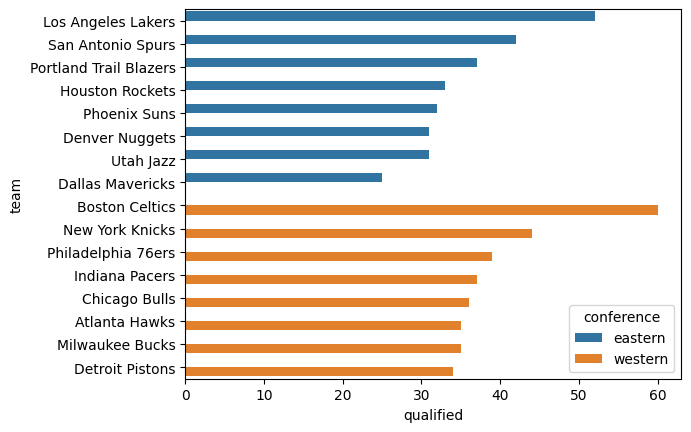

In [9]:
sns.barplot(y='team', x='qualified', hue='conference', data=top_conference_qualifiers)

In [10]:
tb_playoff = agg_col_names(
    df[df.playoffs == True],
    ['win', 'loss'], 
    team_name_changes, 
    agg_fun='sum'
)

tb_offseason = agg_col_names(
    df[df.playoffs == False],
    ['win', 'loss'], 
    team_name_changes, 
    agg_fun='sum'
)

In [11]:
tb_playoff['playoff'] = True
tb_offseason['playoff'] = False
tb = pd.concat([tb_playoff, tb_offseason])
tb.sample(10)

,season,win,loss,team,playoff
47,1994,NaN,NaN,Anaheim Amigos,True
47,1994,NaN,NaN,Providence Steamrollers,False
9,1956,NaN,NaN,Spirits Of St Louis,True
70,2017,NaN,NaN,Pittsburgh Ironmen,True
50,1997,NaN,NaN,Pittsburgh Ironmen,True
77,2024,NaN,NaN,Houston Mavericks,True
63,2010,NaN,NaN,Spirits Of St Louis,True
62,2009,NaN,NaN,Minnesota Muskies,False
11,1958,NaN,NaN,Memphis Tams,True
36,1983,58.0,24.0,Los Angeles Lakers,True


In [13]:
# group teams by wins in playoffs and most wins in offseason
top_5_teams = (
    tb.
    groupby(['team', 'playoff']).
    win.
    sum().
    unstack(level=1).
    sort_values([True, False], ascending=[False, False]).
    stack().
    reset_index().
    rename(columns={0:'win'})[:10]
)
top_5_teams

,team,playoff,win
0,Los Angeles Lakers,False,406.0
1,Los Angeles Lakers,True,3155.0
2,Boston Celtics,False,569.0
3,Boston Celtics,True,3081.0
4,San Antonio Spurs,False,287.0
5,San Antonio Spurs,True,2376.0
6,New York Knicks,False,1023.0
7,New York Knicks,True,1962.0
8,Philadelphia 76ers,False,615.0
9,Philadelphia 76ers,True,1914.0


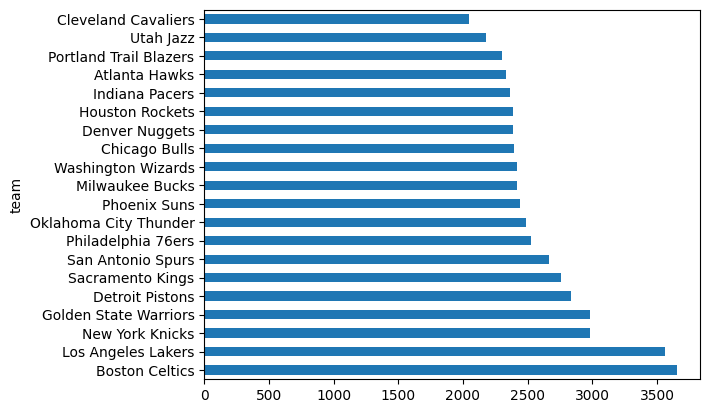

In [21]:
tb.groupby(['team']).win.sum().nlargest(20).plot(kind='barh');

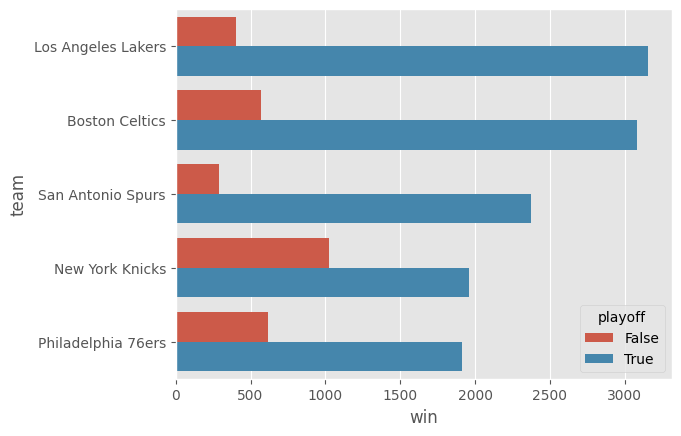

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

ax = sns.barplot(data=top_5_teams, y='team', x='win', hue='playoff')
# ax.title("Most wins by Team when qualified for Playoff and when not qualified")


In [247]:
team_off_def = pd.read_csv("team_off_def.csv")
team_off_def = agg_col_names(
    team_off_def,
    ['off_avg', 'def_avg'], 
    team_name_changes, 
    agg_fun='mean'
)
team_off_def['net_rating'] = team_off_def['off_avg'] - team_off_def['def_avg']
team_off_def.sample(5)

,season,off_avg,def_avg,team,net_rating
52,1999,90.222222,99.333333,Philadelphia 76ers,-9.111111
16,1963,NaN,NaN,League Average,NaN
38,1985,NaN,NaN,Oakland Oaks,NaN
25,1972,NaN,NaN,Pittsburgh Condors,NaN
12,1959,NaN,NaN,Washington Wizards,NaN


In [250]:
off_def_avg = (
    team_off_def.
    drop('season', axis = 1).
    groupby('team').
    mean().
    reset_index()
)
off_def_avg.sort_values('net_rating', ascending=False)[:5]

,team,off_avg,def_avg,net_rating
5,Carolina Cougars,102.769231,103.000000,-0.230769
50,San Antonio Spurs,103.910391,105.593060,-1.733101
21,Kentucky Colonels,98.570136,100.760265,-2.190129
3,Boston Celtics,103.624570,105.205599,-2.236543
24,Los Angeles Lakers,104.304069,106.572220,-2.657622


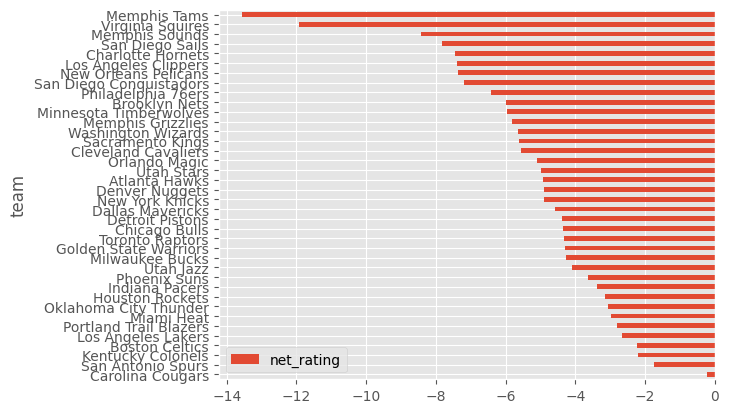

In [252]:
(
    off_def_avg.
    sort_values('net_rating', ascending=False).
    dropna().
    plot(x='team', y='net_rating', kind='barh')
);